## Importing Of Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import os

## Reading Of Data

In [ ]:
data_proforma_one = pd.read_excel("CKD/data/proforma-records - LTH(OGBOMOSO) - 2018-11-22 08_49_39.xlsx")
data_proforma_two = pd.read_excel("CKD/data/Edited proforma-records - LTH(OGBOMOSO) - 2019-01-12 08_02_20.xlsx")

In [3]:
data = pd.concat([data_proforma_one, data_proforma_two], ignore_index=True)

In [4]:
data.columns

Index(['S/N', 'Created At', 'Hospital', 'Patient Id', 'Age of Patient (year)',
       'Gender', 'Blood Pressure (mm/Hg)', 'Weight (kg)',
       'Body temperature (0^c)', 'Hemoglobin (mmol/L)', 'Glucose (mmol/L)',
       'Urea (mmol/L)', 'Creatinine (Umol/L)', 'Sodium (mmol/L)',
       'Calcium (mmol/L)', 'Potassium (mmol/L)', 'Protein Serum (g/dL)',
       'Albumin Serum (g/dL)', 'Phosphorus Serum (mmol/L)',
       'Serum Ferritin (ng/L)', 'Glomerular Filtration Rate (ml/min/1.73 m2)',
       'Intermediate laboratory report(s)',
       'Actual Diagnosed stage of the Acute and Chronic Kidney Disease',
       'Extra Information',
       'Treatment for this stage of the Acute and Chronic Kidney Disease',
       'Comorbidities', 'Date of first appointment',
       'Stage of ACKD at first appointment',
       'Level of education at first appointment',
       'Age of patient at first appointment',
       'Location of Patient at first appointment', 'Lifestyle of patient',
       'Circumstance

In [5]:
data.columns

Index(['S/N', 'Created At', 'Hospital', 'Patient Id', 'Age of Patient (year)',
       'Gender', 'Blood Pressure (mm/Hg)', 'Weight (kg)',
       'Body temperature (0^c)', 'Hemoglobin (mmol/L)', 'Glucose (mmol/L)',
       'Urea (mmol/L)', 'Creatinine (Umol/L)', 'Sodium (mmol/L)',
       'Calcium (mmol/L)', 'Potassium (mmol/L)', 'Protein Serum (g/dL)',
       'Albumin Serum (g/dL)', 'Phosphorus Serum (mmol/L)',
       'Serum Ferritin (ng/L)', 'Glomerular Filtration Rate (ml/min/1.73 m2)',
       'Intermediate laboratory report(s)',
       'Actual Diagnosed stage of the Acute and Chronic Kidney Disease',
       'Extra Information',
       'Treatment for this stage of the Acute and Chronic Kidney Disease',
       'Comorbidities', 'Date of first appointment',
       'Stage of ACKD at first appointment',
       'Level of education at first appointment',
       'Age of patient at first appointment',
       'Location of Patient at first appointment', 'Lifestyle of patient',
       'Circumstance

In [6]:
data.shape

(511, 33)

In [7]:
data.isnull().sum()

S/N                                                                   0
Created At                                                            0
Hospital                                                              0
Patient Id                                                            0
Age of Patient (year)                                                 2
Gender                                                                0
Blood Pressure (mm/Hg)                                                0
Weight (kg)                                                         203
Body temperature (0^c)                                              284
Hemoglobin (mmol/L)                                                 503
Glucose (mmol/L)                                                    290
Urea (mmol/L)                                                        26
Creatinine (Umol/L)                                                  30
Sodium (mmol/L)                                                 

In [8]:
columns_with_lnull = ['Calcium (mmol/L)','Extra Information','Serum Ferritin (ng/L)','Phosphorus Serum (mmol/L)',
                      'Albumin Serum (g/dL)','Protein Serum (g/dL)','Hemoglobin (mmol/L)']

minerals_columns = ['Creatinine (Umol/L)', 'Sodium (mmol/L)', 'Potassium (mmol/L)',
                    'Glucose (mmol/L)', 'Urea (mmol/L)']

In [9]:
data =  data.drop(columns_with_lnull, axis=1)

for cols in minerals_columns:
  if data[cols].dtype == 'object':
    data[cols] = (
        data[cols]
        .astype(str)
        .replace(',', '.', regex=True)
        .astype(float)
    )
  else:
    print(f"Skipped {cols}")

Skipped Sodium (mmol/L)
Skipped Glucose (mmol/L)


In [10]:
data.dtypes

S/N                                                                   int64
Created At                                                           object
Hospital                                                             object
Patient Id                                                            int64
Age of Patient (year)                                               float64
Gender                                                               object
Blood Pressure (mm/Hg)                                               object
Weight (kg)                                                         float64
Body temperature (0^c)                                              float64
Glucose (mmol/L)                                                    float64
Urea (mmol/L)                                                       float64
Creatinine (Umol/L)                                                 float64
Sodium (mmol/L)                                                     float64
Potassium (m

In [11]:
for cols in minerals_columns:
  print("Group By against Actual Diagnosed stage of the Acute and Chronic Kidney Disease")
  print(data.groupby('Actual Diagnosed stage of the Acute and Chronic Kidney Disease')[cols].mean())
  print("|-----------------------------------------------------------------------------------------------------------------------|")
  print("\n")

Group By against Actual Diagnosed stage of the Acute and Chronic Kidney Disease
Actual Diagnosed stage of the Acute and Chronic Kidney Disease
GCF == 0, Undefined             738.21284
Stage 5 GFR <15mL/min/1.73m2    514.45480
Name: Creatinine (Umol/L), dtype: float64
|-----------------------------------------------------------------------------------------------------------------------|


Group By against Actual Diagnosed stage of the Acute and Chronic Kidney Disease
Actual Diagnosed stage of the Acute and Chronic Kidney Disease
GCF == 0, Undefined             130.159633
Stage 5 GFR <15mL/min/1.73m2    134.393182
Name: Sodium (mmol/L), dtype: float64
|-----------------------------------------------------------------------------------------------------------------------|


Group By against Actual Diagnosed stage of the Acute and Chronic Kidney Disease
Actual Diagnosed stage of the Acute and Chronic Kidney Disease
GCF == 0, Undefined             4.354488
Stage 5 GFR <15mL/min/1.73m2    

In [12]:
data['Comorbidities'] = data['Comorbidities'].str.title()

In [13]:
columns_for_modeling = ['Gender', 'Age of Patient (year)', 'Weight (kg)',
                        'Creatinine (Umol/L)', 'Sodium (mmol/L)', 'Potassium (mmol/L)',
                        'Glucose (mmol/L)', 'Urea (mmol/L)', 'Comorbidities',
                          'Actual Diagnosed stage of the Acute and Chronic Kidney Disease','Target'
                        ]

In [14]:
data.dtypes

S/N                                                                   int64
Created At                                                           object
Hospital                                                             object
Patient Id                                                            int64
Age of Patient (year)                                               float64
Gender                                                               object
Blood Pressure (mm/Hg)                                               object
Weight (kg)                                                         float64
Body temperature (0^c)                                              float64
Glucose (mmol/L)                                                    float64
Urea (mmol/L)                                                       float64
Creatinine (Umol/L)                                                 float64
Sodium (mmol/L)                                                     float64
Potassium (m

In [15]:
import pandas as pd
import numpy as np

def clean_blood_pressure(df, column_name):
    """
    Cleans a blood pressure column in a DataFrame.
    
    - Removes trailing slashes
    - Handles missing or invalid values
    - Splits into Systolic (SBP) and Diastolic (DBP) columns
    - Converts to numeric format
    - Keeps the original column

    Args:
    - df (pd.DataFrame): The DataFrame containing the blood pressure column.
    - column_name (str): The column name of blood pressure readings.

    Returns:
    - pd.DataFrame: Updated DataFrame with 'SBP' and 'DBP' columns, keeping the original column.
    """
    # Ensure the column is a string type before processing
    df[column_name] = df[column_name].astype(str)

    # Remove trailing slashes
    df[column_name] = df[column_name].str.rstrip('/')

    # Replace standalone '/' or empty spaces with NaN
    df[column_name] = df[column_name].replace({'/': np.nan, '': np.nan})

    # Split into Systolic (SBP) and Diastolic (DBP) columns
    bp_df = df[column_name].str.split('/', expand=True)
    bp_df.columns = ['SBP', 'DBP']

    # Convert to numeric (invalid values become NaN)
    df['SBP'] = pd.to_numeric(bp_df['SBP'], errors='coerce')
    df['DBP'] = pd.to_numeric(bp_df['DBP'], errors='coerce')

    return df  # No dropping of the original column

data_clean_one = clean_blood_pressure(data, 'Blood Pressure (mm/Hg)')

In [16]:
data.columns

Index(['S/N', 'Created At', 'Hospital', 'Patient Id', 'Age of Patient (year)',
       'Gender', 'Blood Pressure (mm/Hg)', 'Weight (kg)',
       'Body temperature (0^c)', 'Glucose (mmol/L)', 'Urea (mmol/L)',
       'Creatinine (Umol/L)', 'Sodium (mmol/L)', 'Potassium (mmol/L)',
       'Glomerular Filtration Rate (ml/min/1.73 m2)',
       'Intermediate laboratory report(s)',
       'Actual Diagnosed stage of the Acute and Chronic Kidney Disease',
       'Treatment for this stage of the Acute and Chronic Kidney Disease',
       'Comorbidities', 'Date of first appointment',
       'Stage of ACKD at first appointment',
       'Level of education at first appointment',
       'Age of patient at first appointment',
       'Location of Patient at first appointment', 'Lifestyle of patient',
       'Circumstances surrounding first appointment', 'SBP', 'DBP'],
      dtype='object')

In [17]:
def encode_kidney_disease_binary(df, column_name):
    """
    Converts the 'Actual Diagnosed stage of the Acute and Chronic Kidney Disease' column into a binary target variable.
    
    - Assigns 1 to "Stage 5 GFR <15mL/min/1.73m2"
    - Assigns 0 to "GCF == 0, Undefined"
    
    Args:
    - df (pd.DataFrame): The DataFrame containing the kidney disease stage column.
    - column_name (str): The column name to encode.

    Returns:
    - pd.DataFrame: Updated DataFrame with a binary target variable.
    """
    # Define binary mapping
    binary_mapping = {
        "Stage 5 GFR <15mL/min/1.73m2": 1,
        "GCF == 0, Undefined": 0
    }

    # Apply encoding
    df['Target'] = df[column_name].map(binary_mapping)

    return df

data_ = encode_kidney_disease_binary(data, 'Actual Diagnosed stage of the Acute and Chronic Kidney Disease')
data_['Target'].value_counts()


Target
1    300
0    211
Name: count, dtype: int64

In [18]:
data_.describe()

,S/N,Patient Id,Age of Patient (year),Weight (kg),Body temperature (0^c),Glucose (mmol/L),Urea (mmol/L),Creatinine (Umol/L),Sodium (mmol/L),Potassium (mmol/L),Glomerular Filtration Rate (ml/min/1.73 m2),Age of patient at first appointment,SBP,DBP,Target
count,511.000000,5.110000e+02,509.000000,308.000000,227.000000,221.000000,485.000000,481.000000,285.000000,329.000000,511.000000,492.000000,503.000000,503.000000,511.000000
mean,132.007828,1.111111e+09,47.756439,65.555260,36.452863,10.455023,22.369938,598.654811,132.774035,4.315258,0.263742,47.676829,148.304175,88.461233,0.587084
std,74.356006,7.761586e+01,18.876472,17.328311,7.377737,18.366039,22.426236,612.836969,9.221452,1.196067,0.616968,18.763488,33.751272,21.054709,0.492840
min,1.000000,1.111111e+09,0.013699,2.560000,-38.000000,2.400000,1.600000,1.582000,103.600000,1.100000,0.000000,5.000000,77.000000,10.000000,0.000000
25%,68.000000,1.111111e+09,34.000000,55.000000,36.400000,5.200000,8.200000,148.000000,128.000000,3.400000,0.000000,34.000000,120.000000,74.000000,0.000000
50%,132.000000,1.111111e+09,48.000000,64.000000,36.800000,7.100000,17.800000,326.000000,134.000000,4.100000,0.070101,48.000000,144.000000,86.000000,1.000000
75%,195.500000,1.111111e+09,63.000000,77.500000,37.300000,10.000000,30.000000,849.000000,138.000000,5.000000,0.289529,62.000000,168.000000,100.000000,1.000000
max,271.000000,1.111111e+09,85.000000,108.700000,59.400000,173.000000,219.000000,3300.000000,177.000000,8.000000,6.027917,85.000000,292.000000,160.000000,1.000000


## Data Visualization And Tabularization

In [19]:
data_['Actual Diagnosed stage of the Acute and Chronic Kidney Disease'].value_counts()

Actual Diagnosed stage of the Acute and Chronic Kidney Disease
Stage 5 GFR <15mL/min/1.73m2    300
GCF == 0, Undefined             211
Name: count, dtype: int64

In [20]:
data_['Gender'].value_counts()

Gender
Male      325
Female    186
Name: count, dtype: int64

In [21]:
data_[data_['Gender'] == 'Male']['Actual Diagnosed stage of the Acute and Chronic Kidney Disease'].value_counts()

Actual Diagnosed stage of the Acute and Chronic Kidney Disease
Stage 5 GFR <15mL/min/1.73m2    194
GCF == 0, Undefined             131
Name: count, dtype: int64

In [22]:
data_[data_['Gender'] == 'Female']['Actual Diagnosed stage of the Acute and Chronic Kidney Disease'].value_counts()

Actual Diagnosed stage of the Acute and Chronic Kidney Disease
Stage 5 GFR <15mL/min/1.73m2    106
GCF == 0, Undefined              80
Name: count, dtype: int64

In [23]:
data_.groupby('Actual Diagnosed stage of the Acute and Chronic Kidney Disease')['Age of Patient (year)'].mean()

Actual Diagnosed stage of the Acute and Chronic Kidney Disease
GCF == 0, Undefined             46.803828
Stage 5 GFR <15mL/min/1.73m2    48.420091
Name: Age of Patient (year), dtype: float64

In [24]:
# group by the Actual Diagnosed star of acute and ckd to the average weight on both sides
data_.groupby('Actual Diagnosed stage of the Acute and Chronic Kidney Disease')['Weight (kg)'].mean()

Actual Diagnosed stage of the Acute and Chronic Kidney Disease
GCF == 0, Undefined             74.2500
Stage 5 GFR <15mL/min/1.73m2    65.3234
Name: Weight (kg), dtype: float64

In [25]:
data_['Comorbidities'].value_counts().nlargest(10)

Comorbidities
Hypertension                  183
No Disease Selected            86
Hyperkalemia                   30
Diabetes                       16
Obstructive Uropathy           11
Hyperglycemia                  10
Hypertensive Heart Disease     10
Sepsis Syndrome                 9
Chronic Renal Failure           8
Diabetic Nephropathy            8
Name: count, dtype: int64

Text(0.5, 0, 'Kidney Disease Stage')

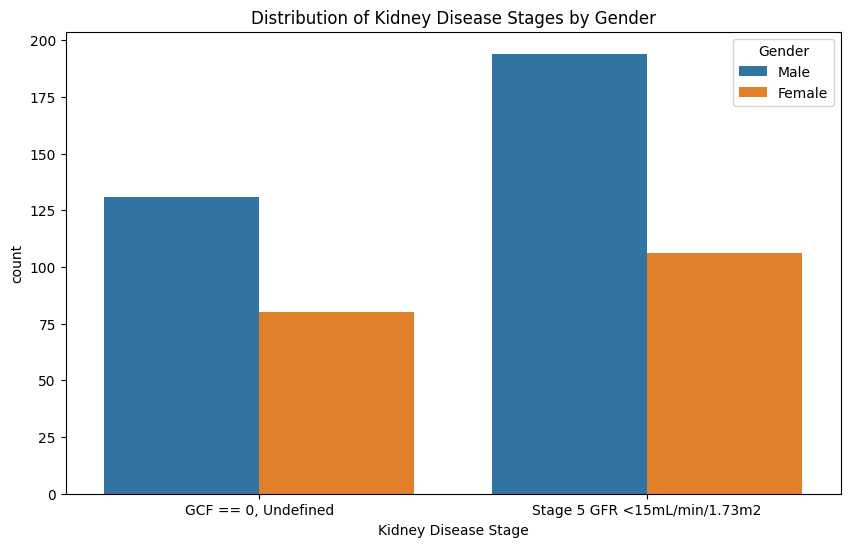

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Actual Diagnosed stage of the Acute and Chronic Kidney Disease', hue='Gender', data=data_)
plt.title('Distribution of Kidney Disease Stages by Gender')
plt.xlabel('Kidney Disease Stage')

<Figure size 1200x1000 with 0 Axes>

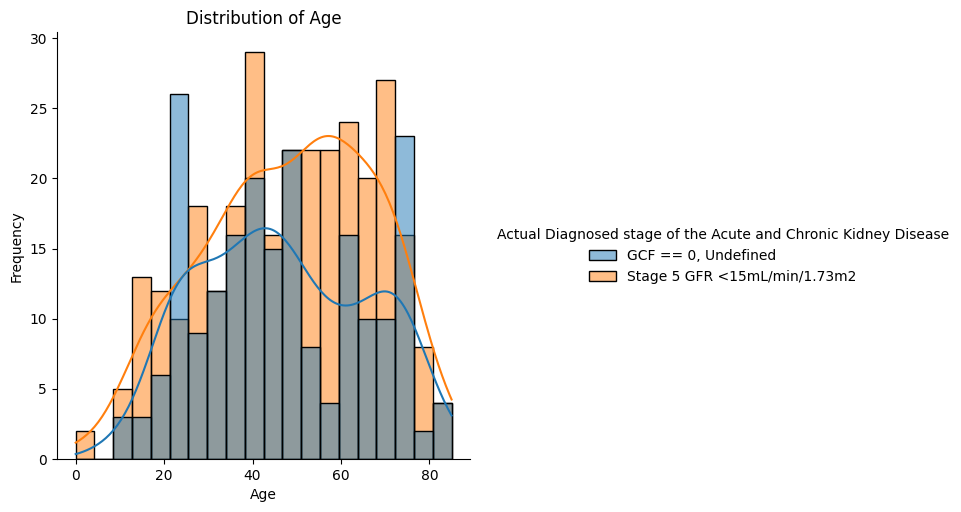

In [27]:
plt.figure(figsize=(12,10))
sns.displot(data=data_, x='Age of Patient (year)', hue='Actual Diagnosed stage of the Acute and Chronic Kidney Disease',bins=20, kde=True) # Changed this line
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<Figure size 1200x1000 with 0 Axes>

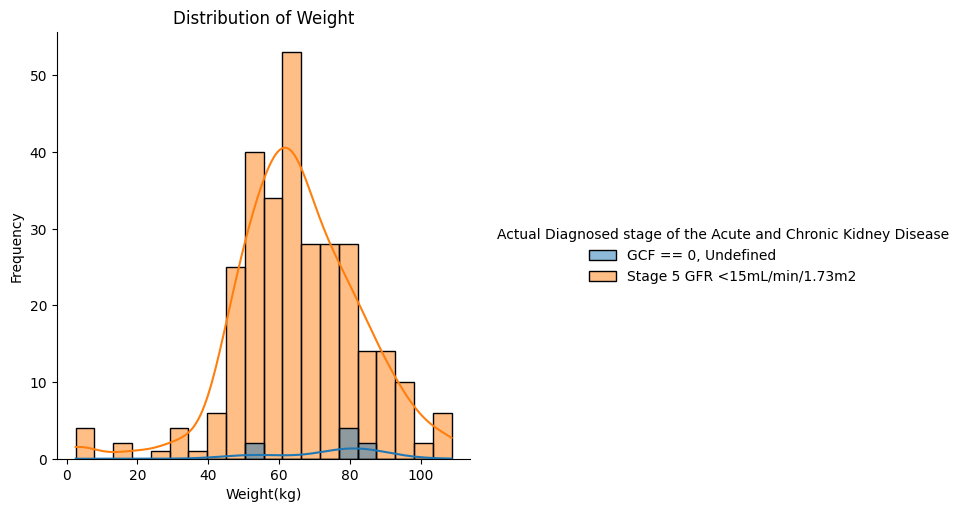

In [28]:
plt.figure(figsize=(12,10))
sns.displot(data=data_, x='Weight (kg)', hue='Actual Diagnosed stage of the Acute and Chronic Kidney Disease',bins=20, kde=True) # Changed this line
plt.title('Distribution of Weight')
plt.xlabel('Weight(kg)')
plt.ylabel('Frequency')
plt.show()

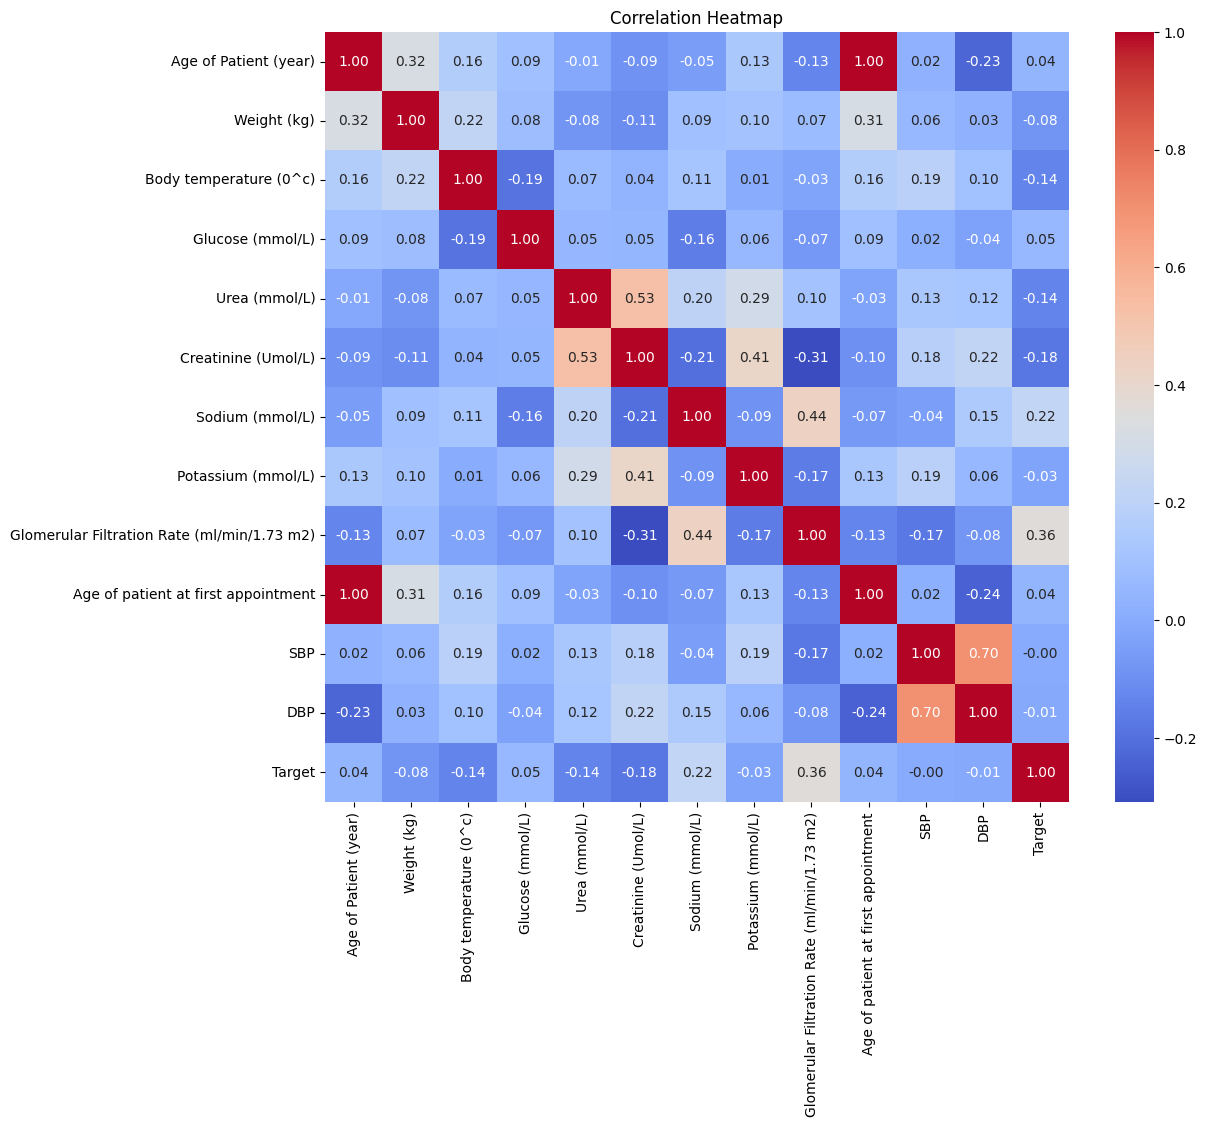

In [29]:
numerical_columns = data_.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns.remove('S/N')
numerical_columns.remove('Patient Id')

correlation_table = data_[numerical_columns].corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_table, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

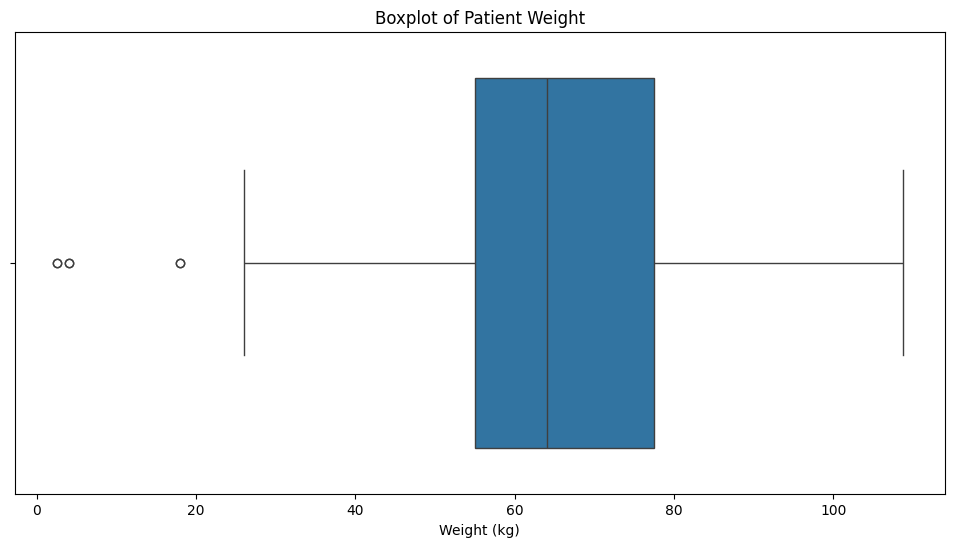

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=data_['Weight (kg)'])
plt.title('Boxplot of Patient Weight')
plt.show()

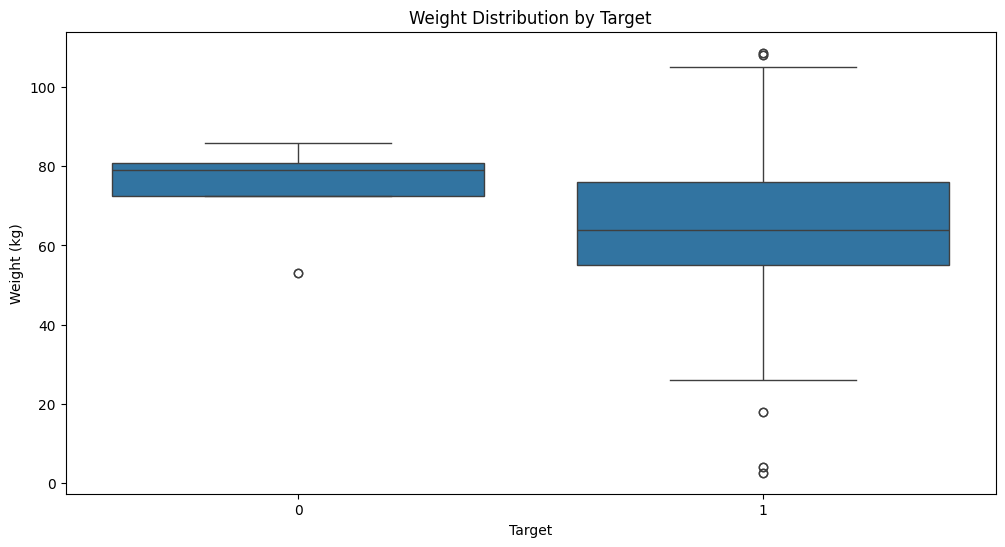

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Target', y='Weight (kg)', data=data_)
plt.title('Weight Distribution by Target')
plt.show()

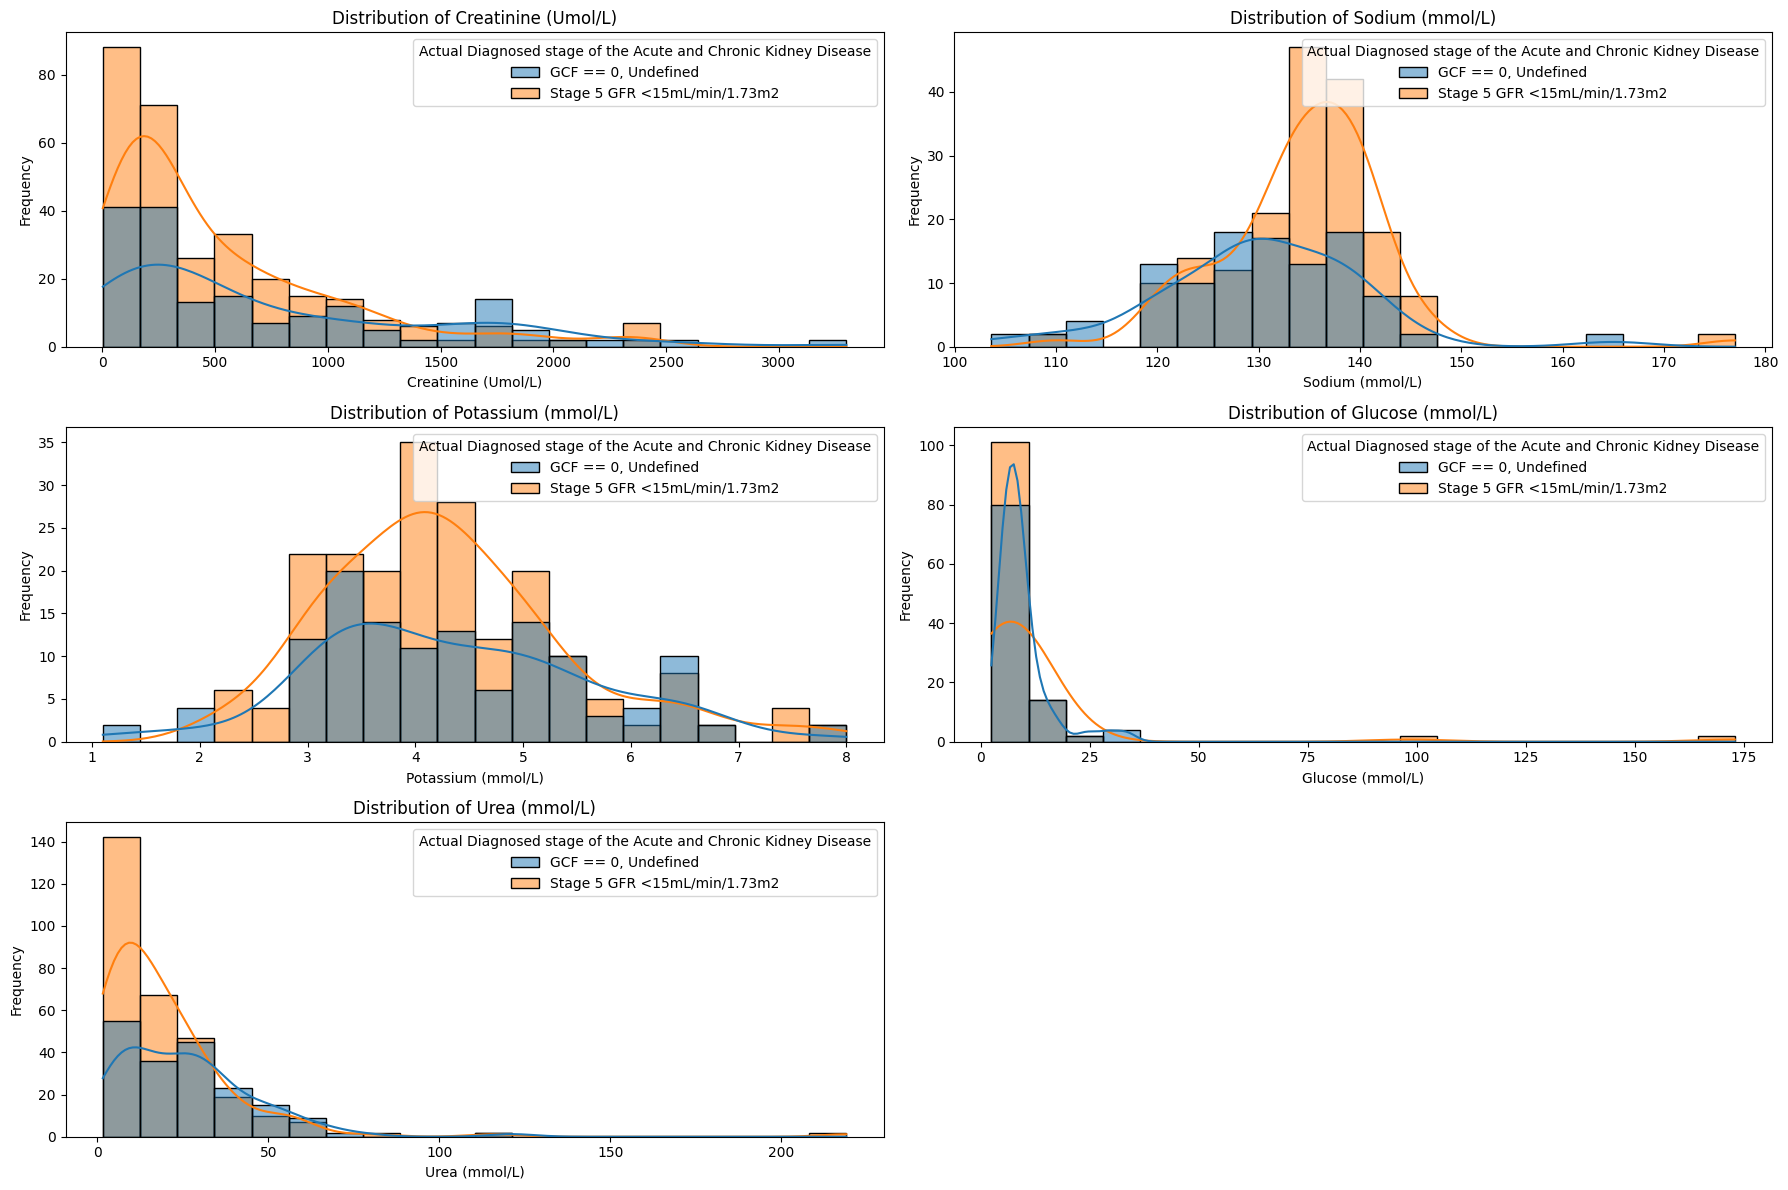

In [32]:
fig, axes = plt.subplots(nrows=(len(minerals_columns) + 1) // 2, ncols=2, figsize=(18, 12)) 
axes = axes.flatten()

# Loop over the mineral columns and generate a plot for each
for idx, col in enumerate(minerals_columns):
    sns.histplot(data=data_, x=col, hue='Actual Diagnosed stage of the Acute and Chronic Kidney Disease',
                 bins=20, kde=True, ax=axes[idx]) 
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

for idx in range(len(minerals_columns), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [33]:
# check for duplicates
duplicates = data_.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [34]:
data_.isnull().sum().sort_values(ascending=False)

Glucose (mmol/L)                                                    290
Body temperature (0^c)                                              284
Sodium (mmol/L)                                                     226
Weight (kg)                                                         203
Potassium (mmol/L)                                                  182
Intermediate laboratory report(s)                                   111
Level of education at first appointment                              43
Creatinine (Umol/L)                                                  30
Urea (mmol/L)                                                        26
Comorbidities                                                        26
Circumstances surrounding first appointment                          20
Age of patient at first appointment                                  19
Treatment for this stage of the Acute and Chronic Kidney Disease     14
Lifestyle of patient                                            

In [35]:
data_.shape

(511, 29)

## Filling Missing Values

In [36]:
data_

,S/N,Created At,Hospital,Patient Id,Age of Patient (year),Gender,Blood Pressure (mm/Hg),Weight (kg),Body temperature (0^c),Glucose (mmol/L),...,Date of first appointment,Stage of ACKD at first appointment,Level of education at first appointment,Age of patient at first appointment,Location of Patient at first appointment,Lifestyle of patient,Circumstances surrounding first appointment,SBP,DBP,Target
0,1,"Wed, Nov 21, 2018 11:49 AM",LTH(OGBOMOSO),1111111368,74.000000,Male,119/69,NaN,36.0,33.3,...,2013-05-02,"GCF == 0, Undefined",Retired civil servant,74.0,Ogbomoso,"A 74 years old retiree, married in monogamous ...",Wound on the left foot\nHiccups,119.0,69.0,0
1,2,"Wed, Nov 21, 2018 11:48 AM",LTH(OGBOMOSO),1111111367,60.000000,Male,130/80,NaN,NaN,NaN,...,2016-04-26,"GCF == 0, Undefined",Pastoring,60.0,"LAUTECH TEACHING HOSPITAL, OGBOMOSO.","A 60 years old man, Pastor, Yoruba and Christi...",History of back pain and waist pain associated...,130.0,80.0,0
2,3,"Wed, Nov 21, 2018 11:23 AM",LTH(OGBOMOSO),1111111366,73.000000,Male,158/80,51.00,38.2,8.6,...,2012-10-24,Stage 5 GFR <15mL/min/1.73m2,NaN,73.0,LTH OGBOMOSO,"A 73 year old man,married in a polygamous sett...",Difficulty in passing urine,158.0,80.0,1
3,4,"Wed, Nov 21, 2018 11:19 AM",LTH(OGBOMOSO),1111111365,22.000000,Female,112/74,NaN,37.4,NaN,...,2017-07-17,"GCF == 0, Undefined",Student,22.0,"LAUTECH TEACHING HOSPITAL, OGBOMOSO.","A 22 years old student, Female, Yoruba and Chr...",Headache x 2/52\nMalaria x 2/52\nFever x 2/52,112.0,74.0,0
4,5,"Tue, Nov 20, 2018 12:34 PM",LTH(OGBOMOSO),1111111364,69.000000,Male,126/70,94.00,NaN,NaN,...,2011-12-14,Stage 5 GFR <15mL/min/1.73m2,Retiree,69.0,Ogbomoso,"A 69 years old man, Yoruba, Christianity and R...","Elevated BP, \nLegs swelling about 2/52",126.0,70.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,267,"Wed, Oct 24, 2018 4:31 PM",LTH(OGBOMOSO),1111111115,62.000000,Female,160/78,93.00,36.7,10.8,...,2012-09-13,Stage 5 GFR <15mL/min/1.73m2,60 year old retiree,60.0,UITH,a 60 year old retiree who is yoruba and a chri...,wound on left big toe,160.0,78.0,1
507,268,"Wed, Oct 24, 2018 4:05 PM",LTH(OGBOMOSO),1111111114,15.000000,Female,160/124,46.00,36.4,NaN,...,2018-03-09,Stage 5 GFR <15mL/min/1.73m2,NaN,15.0,oyo,"Single, 5 siblings, Took Herbal Concortion, , ...",Referral from oyo state hospital management bo...,160.0,124.0,1
508,269,"Wed, Oct 24, 2018 3:49 PM",LTH(OGBOMOSO),1111111113,0.013699,Male,NaN,2.56,35.6,2.4,...,2018-08-04,Stage 5 GFR <15mL/min/1.73m2,NaN,5.0,"traditional birth home[CAC], Ogbomoso",A 5 days old baby,"child is a product of unplanned conception, th...",NaN,NaN,1
509,270,"Wed, Oct 24, 2018 2:58 PM",LTH(OGBOMOSO),1111111112,19.000000,Male,250/150,62.20,36.2,7.6,...,2017-04-27,Stage 5 GFR <15mL/min/1.73m2,ssce,19.0,Oyo Alaafin,"A secondary school student, Islam as a religio...",Systemic hypertensive r/o CKD,250.0,150.0,1


In [37]:
# Sort the data by the 'age' column in ascending order
data_ = data_.sort_values(by='Age of Patient (year)', ascending=True)

# Forward fill missing values
data_ = data_.ffill()

# # Display the first few rows to verify
data_.sample(10)

,S/N,Created At,Hospital,Patient Id,Age of Patient (year),Gender,Blood Pressure (mm/Hg),Weight (kg),Body temperature (0^c),Glucose (mmol/L),...,Date of first appointment,Stage of ACKD at first appointment,Level of education at first appointment,Age of patient at first appointment,Location of Patient at first appointment,Lifestyle of patient,Circumstances surrounding first appointment,SBP,DBP,Target
269,30,"Tue, Nov 20, 2018 11:59 AM",LTH(OGBOMOSO),1111111363,66.0,Male,110/60,62.0,36.7,5.5,...,2018-04-24,Stage 5 GFR <15mL/min/1.73m2,Retiree,66.0,OYO STATE HOSPITAL MANAGEMENT BOARD,"A 66 year old male retiree,christian from yoru...",Recurrent leg swelling,110.0,60.0,1
124,125,"Tue, Nov 6, 2018 1:05 PM",LTH(OGBOMOSO),1111111235,68.0,Male,138/89,77.0,36.5,10.5,...,9/16/2015,Stage 5 GFR <15mL/min/1.73m2,engeenering,68.0,Ogbomoso,"A 68 years old who is married with children, a...",BOO secondary to BPH,138.0,89.0,1
31,32,"Fri, Nov 16, 2018 11:21 AM",LTH(OGBOMOSO),1111111337,39.0,Male,200/110,66.0,37.3,4.7,...,2017-02-01,Stage 5 GFR <15mL/min/1.73m2,Bricklayer,39.0,Ogbomoso,"A 39 years old bricklayer, no history of herba...",Associated Insomnia\nDifficulty with breathing...,200.0,110.0,1
209,210,"Mon, Oct 29, 2018 10:44 AM",LTH(OGBOMOSO),1111111149,40.0,Male,168/100,63.6,36.6,4.7,...,2014-01-01,"GCF == 0, Undefined",Trader,40.0,"UNIVERSITY OF ILORIN TEACHING HOSPITAL, ILORIN.","A 40 years old man, married, Yoruba, and Islam.","He was found to have develop body weakness, an...",168.0,100.0,0
324,85,"Wed, Nov 14, 2018 1:56 PM",LTH(OGBOMOSO),1111111305,27.0,Male,179/116,62.0,36.2,8.2,...,2013-11-06,Stage 5 GFR <15mL/min/1.73m2,student,27.0,Akure,"A 27 years old student, single, he took alcoho...","Recurrent cough, difficulty in breathing, abdo...",179.0,116.0,1
474,235,"Mon, Oct 29, 2018 10:41 AM",LTH(OGBOMOSO),1111111148,16.0,Male,180/120,49.0,36.4,4.9,...,2014-10-25,Stage 5 GFR <15mL/min/1.73m2,secondary school student,16.0,LTH,A 16 year old student in secondary school,obstructive uropathy secondary to posterior ur...,180.0,120.0,1
328,89,"Wed, Nov 14, 2018 11:12 AM",LTH(OGBOMOSO),1111111301,75.0,Male,140/70,85.0,36.7,4.6,...,02/05/2014,Stage 5 GFR <15mL/min/1.73m2,retiree,75.0,Ogbomoso,A 75 years old man who is married with childre...,CKD secondary to obstructive uropathy,140.0,70.0,1
221,222,"Fri, Oct 26, 2018 11:06 AM",LTH(OGBOMOSO),1111111137,35.0,Male,134/94,47.0,36.6,8.6,...,2017-06-09,"GCF == 0, Undefined",Business man (Motor dealer),37.0,"MINISTRY OF HEALTH KWARA STATE HOSPITALS, ILORIN","A 37 years old man, Muslim, Yoruba ethnicity, ...",A 37 years old man with a case of CDK with Ure...,134.0,94.0,0
123,124,"Tue, Nov 6, 2018 2:13 PM",LTH(OGBOMOSO),1111111236,62.0,Male,230/90,76.0,36.2,5.1,...,2015-09-09,"GCF == 0, Undefined",trader,62.0,LTH OGBOMOSO,"A 62 year old male trader,christian,igbo. he ...",Elevated blood pressure,230.0,90.0,0
75,76,"Tue, Nov 13, 2018 12:41 PM",LTH(OGBOMOSO),1111111286,47.0,Male,105/81,64.0,37.2,6.7,...,8/09/2013,"GCF == 0, Undefined",TEACHER,47.0,OGBOMOSO,The patient is a Christian from the Yoruba tri...,Apparently well until 2/7 prior presentation w...,105.0,81.0,0


In [38]:
for cols in data.columns:
    if data[cols].isnull().sum() > 0:
        print(f"{cols} has missing values")
        print(f"{data_[cols].dtypes}")
    else:
        pass

Age of Patient (year) has missing values
float64
Blood Pressure (mm/Hg) has missing values
object
Weight (kg) has missing values
float64
Body temperature (0^c) has missing values
float64
Glucose (mmol/L) has missing values
float64
Urea (mmol/L) has missing values
float64
Creatinine (Umol/L) has missing values
float64
Sodium (mmol/L) has missing values
float64
Potassium (mmol/L) has missing values
float64
Intermediate laboratory report(s) has missing values
object
Treatment for this stage of the Acute and Chronic Kidney Disease has missing values
object
Comorbidities has missing values
object
Date of first appointment has missing values
object
Level of education at first appointment has missing values
object
Age of patient at first appointment has missing values
float64
Location of Patient at first appointment has missing values
object
Lifestyle of patient has missing values
object
Circumstances surrounding first appointment has missing values
object
SBP has missing values
float64
DBP h

In [39]:
data_.isnull().sum()

S/N                                                                 0
Created At                                                          0
Hospital                                                            0
Patient Id                                                          0
Age of Patient (year)                                               0
Gender                                                              0
Blood Pressure (mm/Hg)                                              2
Weight (kg)                                                         0
Body temperature (0^c)                                              0
Glucose (mmol/L)                                                    0
Urea (mmol/L)                                                       0
Creatinine (Umol/L)                                                 0
Sodium (mmol/L)                                                     0
Potassium (mmol/L)                                                  0
Glomerular Filtratio

In [40]:
# Check for duplicate rows in the data
duplicates = data_[data_.duplicated()]

# Display duplicate rows, if any
print(f"Number of duplicate rows: {len(duplicates)}")
duplicates.head()

Number of duplicate rows: 0


,S/N,Created At,Hospital,Patient Id,Age of Patient (year),Gender,Blood Pressure (mm/Hg),Weight (kg),Body temperature (0^c),Glucose (mmol/L),...,Date of first appointment,Stage of ACKD at first appointment,Level of education at first appointment,Age of patient at first appointment,Location of Patient at first appointment,Lifestyle of patient,Circumstances surrounding first appointment,SBP,DBP,Target


In [41]:
data_['Level of education at first appointment'] = data_['Level of education at first appointment'].str.title()
data_['Level of education at first appointment'].value_counts().nlargest(50)

Level of education at first appointment
Trader                                  85
Civil Servant                           35
Trading                                 34
Farmer                                  29
Retiree                                 27
Student                                 25
Tertiary Level Of Education             20
Secondary School Student                16
Teacher                                 14
Clergy                                  12
Retired Teacher                         10
Retired Civil Servant                   10
Ssce                                     9
Civic Servant                            6
Farming                                  6
Electrician                              6
Artisan                                  6
Clergyman                                5
Tailor                                   5
Petty Trader                             4
Poultry Farmer                           4
Patent Medicine Seller                   4
Bricklayer    

In [42]:
education_mapping = {
    # Collapse educational qualifications
    # Education Levels
    'Tertiary Level Of Education': 'Tertiary Education',
    'B.Sc': 'Tertiary Education',
    'Undergraduate': 'Tertiary Education',
    '200 Level': 'Tertiary Education',
    'Secondary School Student': 'Secondary Education',
    'Ssce': 'Secondary Education',
    'Primary School': 'Primary Education',
    'Primary School Teacher': 'Primary Education',
    'Graduate': 'Tertiary Education',
    'M.Sc': 'Tertiary Education',
    'Nd': 'Tertiary Education',
    'Lecturing': 'Academic',
    'Pharmacist': 'Healthcare Professional',


    # Teaching-related roles
    'Teacher': 'Teacher',
    'Secondary School Teacher': 'Teacher',
    'School Teacher': 'Teacher',
    'Teaching': 'Teacher',
    'Retired Teacher': 'Retired Teacher',
    'Retired Primary School Teacher': 'Retired Teacher',

    # Civil Service-related roles
    'Civil Servant': 'Civil Servant',
    'Civic Servant': 'Civil Servant',
    'Retired Civil Servant': 'Retired Civil Servant',

    # Retirement
    'Retiree': 'Retiree',
    '60 Year Old Retiree': 'Retiree',
    'Retired Worker From General Hospital': 'Retiree',
    'Retired Health Technician': 'Retiree',

    # Redundant or specific job labels
    'Truck Driver': 'Driver',
    'Conductor': 'Driver',
    
    # Vocational work & artisan
    'Artisian': 'Vocational Worker',
    'Tailor/Artisan': 'Vocational Worker',
    'Fashion Designer': 'Vocational Worker',
    'Automobile Mechanic': 'Vocational Worker',
    'Carpenter': 'Vocational Worker',
    'Computer Operator': 'Vocational Worker',

    # Farming-related
    'Farmer/Motorcyclist': 'Farmer',

    # Civil Service related
    'Public Servant': 'Civil Servant',
    'Staff Of Lth': 'Civil Servant',  # If LTH = govt hospital
    'Retired Military Officer': 'Retired Civil Servant',
    'Retired Banker': 'Retired Civil Servant',
    'Retired Military Man': 'Retired Civil Servant',
    'Retired Security Officer': 'Retired Civil Servant',
    '72 Year Old Civil Servant Retiree': 'Retired Civil Servant',

    # Other professions
    'Businessman': 'Trader',
    'Business Man (Motor Dealer)': 'Trader',
    'Contractor': 'Trader',
    'Self Employed': 'Trader',
    
    # Miscellaneous
    'Housewife': 'Unemployed',
    'Primary 5 Pupil': 'Primary Education',
    'Herbalist': 'Informal Health Worker',

        # Farmers
    'Farmer': 'Farmer',
    'Farming': 'Farmer',
    'Poultry Farmer': 'Farmer',
    'Cattle Rearer': 'Farmer',

    # Students
    'Student': 'Student',
    'Schooling': 'Student',

    # Technical / Vocational Jobs
    'Electrician': 'Vocational Worker',
    'Welder': 'Vocational Worker',
    'Tailor': 'Vocational Worker',
    'Bricklayer': 'Vocational Worker',
    'Artisan': 'Vocational Worker',
    'Trade/Bricklayer': 'Vocational Worker',
    'Building Contractor': 'Vocational Worker',

    # Healthcare
    'Medical Doctor': 'Healthcare Professional',
    'Consultant': 'Healthcare Professional',

    # Others
    'Lecturer': 'Academic',
    'Professor': 'Academic',
    'Driver': 'Driver',
    'Driving': 'Driver',
    'Applicant': 'Unemployed',
    'Dependant': 'Unemployed',
    'Patent Medicine Seller': 'Informal Health Worker',


}


data_['Level of education at first appointment'] = data_['Level of education at first appointment'].replace(education_mapping)
data_['Level of education at first appointment'].value_counts().nlargest(50)

Level of education at first appointment
Trader                     93
Vocational Worker          45
Civil Servant              45
Farmer                     44
Tertiary Education         36
Trading                    34
Retiree                    34
Student                    28
Secondary Education        25
Retired Civil Servant      22
Teacher                    21
Clergy                     12
Retired Teacher            12
Primary Education           9
Academic                    8
Driver                      8
Healthcare Professional     6
Informal Health Worker      6
Unemployed                  6
Clergyman                   5
Petty Trader                4
Pastoring                   2
Engeenering                 2
Factory Worker              2
Name: count, dtype: int64

In [43]:
data_['Lifestyle of patient'] = data_['Lifestyle of patient'].str.title()

In [44]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all lifestyle descriptions into one string
text = ' '.join(data_['Lifestyle of patient'].dropna().astype(str)).lower()

# Define stopwords
stopwords = set(STOPWORDS)
# You can add more custom stopwords if needed
custom_stopwords = {'patient', 'lifestyle', 'also', 'none'}  # Add words you want to exclude
stopwords.update(custom_stopwords)

# Create the WordCloud object with stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    stopwords=stopwords,
    max_words=100
).generate(text)

# Plot the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Lifestyle of Patients')
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

# Patient Record Data

In [ ]:
import pandas as pd
data_p = pd.read_csv("CKD/Patients Records.xlsx - Worksheet.csv")

In [2]:
data_p.drop(['#', 'Patient ID', 'Unnamed: 36',  'Unnamed: 35',  'Unnamed: 34'], axis=1, inplace=True)

In [3]:
data_p.isnull().sum().sort_values(ascending=False)

Serum Ferritin (ng/L)                                               253
Glomerular Filtration Rate (ml/min/1.73 m2)                         242
Hemoglobin (mmol/L)                                                 240
Albumin Serum (g/dL)                                                239
Protein Serum (g/dL)                                                235
Phosphorus Serum (mmol/L)                                           234
Calcium (mmol/L)                                                    231
Glucose (mmol/L)                                                    230
Lifestyle of patient                                                214
Extra Information                                                   199
Weight (kg)                                                         178
Stage of ACKD at first appointment                                  175
Actual Diagnosed stage of the Acute and Chronic Kidney Disease      162
Circumstances surrounding first appointment                     

In [4]:
data_p.shape

(257, 32)

In [5]:
columns_with_lnull = ['Calcium (mmol/L)','Extra Information','Serum Ferritin (ng/L)','Phosphorus Serum (mmol/L)',
                      'Albumin Serum (g/dL)','Protein Serum (g/dL)','Hemoglobin (mmol/L)']

minerals_columns = ['Creatinine (Umol/L)', 'Sodium (mmol/L)', 'Potassium (mmol/L)',
                    'Glucose (mmol/L)', 'Urea (mmol/L)']

In [6]:
data_p[minerals_columns].isnull().sum().sort_values(ascending=False)

Glucose (mmol/L)       230
Sodium (mmol/L)         20
Potassium (mmol/L)      18
Urea (mmol/L)           14
Creatinine (Umol/L)     12
dtype: int64

In [7]:
data_p.drop(columns_with_lnull, axis=1, inplace=True)
data_p.shape

(257, 25)

In [8]:
# 1 for (20-29; 2 for (30 -39); 3 for (40-49); 4 for (50-59); 5 for (60-69); 6 for (>=70)
# age mapping


In [9]:
# Gender mapping using map()
def gender_map(df, column):
    gender_mapping = {1: "Male", 2: "Female"}
    df[column] = df[column].map(gender_mapping)
    return df

# Apply the gender mapping
gender_map(data_p, 'Gender')

,Hospital,Age of Patient,Gender,Blood Pressure (mm/Hg),Weight (kg),Body temperature (0^c),Glucose (mmol/L),Urea (mmol/L),Creatinine (Umol/L),Sodium (mmol/L),...,Comorbidities,Date of first appointment,Stage of ACKD at first appointment,Level of education at first appointment,Age of patient at first appointment,Location of Patient at first appointment,Circumstances surrounding first appointment,Symptoms,Lifestyle of patient,Created At
0,UCH(University College Hospital Ibadan),2.0,Male,119/69,20,32.0,25,120,150,12,...,"4,5,75,76",2021-04-26 00:00:00,3.0,3,3,Ogbomosho,The patient was rushed in,"2,42,43","2,9",2
1,UCH(University College Hospital Ibadan),4.0,Female,173/86,78,36.6,NaN,32,1.8,130,...,"3,6",2021-03-09 00:00:00,1.0,1,6,"Ikolaba, Ibadan",Patient was referred from another ARFH ORMC Ik...,"6,12",NaN,2
2,UCH(University College Hospital Ibadan),6.0,Male,133/70,58,36.7,NaN,55,4.2,128,...,3,2021-02-09 00:00:00,NaN,1,8,NaN,Referred from consultant to consultant,"37,44,45",NaN,3
3,UCH(University College Hospital Ibadan),6.0,Male,133/70,58,36.7,NaN,55,4.2,NaN,...,3,2021-02-09 00:00:00,NaN,1,8,Ibadan,Referred from consultant to consultant,37,NaN,3
4,UCH(University College Hospital Ibadan),1.0,Female,130/102,68,36.8,NaN,2,65,134,...,NaN,2021-01-02 00:00:00,NaN,1,3,Ibadan,Referred from consultant to consultant,2,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,UCH(University College Hospital Ibadan),0.0,Female,180/120,NaN,NaN,NaN,158,6.7,137,...,16,2019-07-30 00:00:00,1.0,4,2,"UCH,Inadan",Referred from consultant to consultant,"3,4,46,81",NaN,3
253,UCH(University College Hospital Ibadan),4.0,Male,145/89mmHg,80kg,36.3,NaN,56,7.2,140,...,"3,12,40,156",2020-03-19 00:00:00,NaN,1,6,Ibadan,NaN,"2,14,136",NaN,4
254,UCH(University College Hospital Ibadan),6.0,Male,130/90,NaN,36.5,NaN,124,5.7,147,...,"3,16",2019-10-23 00:00:00,NaN,1,8,"UCH,Inadan",Referred from consultant to consultant,1,NaN,3
255,UCH(University College Hospital Ibadan),2.0,Male,140/80,NaN,37.0,NaN,195,14.9,115,...,38,2019-04-15 00:00:00,NaN,5,4,"UCH,Inadan",Referred from consultant to consultant,2,NaN,3


In [10]:
import re

# Clean the 'Blood Pressure (mm/Hg)' column
def colum_text_processor(df, column):
    # Remove all characters except digits, slashes, and decimal points
    df[column] = df[column].str.replace(r'[^\d/\.]', '', regex=True)
    return df

# Apply the cleaning function
data_p = colum_text_processor(data_p, 'Blood Pressure (mm/Hg)')

# Display the cleaned column
data_p['Blood Pressure (mm/Hg)'].head()

0     119/69
1     173/86
2     133/70
3     133/70
4    130/102
Name: Blood Pressure (mm/Hg), dtype: object

In [13]:
import pandas as pd
import numpy as np

def clean_blood_pressure(df, column_name):
    """
    Cleans a blood pressure column in a DataFrame.
    
    - Removes trailing slashes
    - Handles missing or invalid values
    - Splits into Systolic (SBP) and Diastolic (DBP) columns
    - Converts to numeric format
    - Keeps the original column

    Args:
    - df (pd.DataFrame): The DataFrame containing the blood pressure column.
    - column_name (str): The column name of blood pressure readings.

    Returns:
    - pd.DataFrame: Updated DataFrame with 'SBP' and 'DBP' columns, keeping the original column.
    """
    # Ensure the column is a string type before processing
    df[column_name] = df[column_name].astype(str)

    # Remove trailing slashes
    df[column_name] = df[column_name].str.rstrip('/')

    # Replace standalone '/' or empty spaces with NaN
    df[column_name] = df[column_name].replace({'/': np.nan, '': np.nan})

    # Split into Systolic (SBP) and Diastolic (DBP) columns
    bp_df = df[column_name].str.split('/', expand=True)
    bp_df.columns = ['SBP', 'DBP']

    # Convert to numeric (invalid values become NaN)
    df['SBP'] = pd.to_numeric(bp_df['SBP'], errors='coerce')
    df['DBP'] = pd.to_numeric(bp_df['DBP'], errors='coerce')

    return df  # No dropping of the original column


In [14]:
data_p = clean_blood_pressure(data_p, 'Blood Pressure (mm/Hg)')

In [15]:
data_p

,Hospital,Age of Patient,Gender,Blood Pressure (mm/Hg),Weight (kg),Body temperature (0^c),Glucose (mmol/L),Urea (mmol/L),Creatinine (Umol/L),Sodium (mmol/L),...,Stage of ACKD at first appointment,Level of education at first appointment,Age of patient at first appointment,Location of Patient at first appointment,Circumstances surrounding first appointment,Symptoms,Lifestyle of patient,Created At,SBP,DBP
0,UCH(University College Hospital Ibadan),2.0,Male,119/69,20,32.0,25,120,150,12,...,3.0,3,3,Ogbomosho,The patient was rushed in,"2,42,43","2,9",2,119.0,69.0
1,UCH(University College Hospital Ibadan),4.0,Female,173/86,78,36.6,NaN,32,1.8,130,...,1.0,1,6,"Ikolaba, Ibadan",Patient was referred from another ARFH ORMC Ik...,"6,12",NaN,2,173.0,86.0
2,UCH(University College Hospital Ibadan),6.0,Male,133/70,58,36.7,NaN,55,4.2,128,...,NaN,1,8,NaN,Referred from consultant to consultant,"37,44,45",NaN,3,133.0,70.0
3,UCH(University College Hospital Ibadan),6.0,Male,133/70,58,36.7,NaN,55,4.2,NaN,...,NaN,1,8,Ibadan,Referred from consultant to consultant,37,NaN,3,133.0,70.0
4,UCH(University College Hospital Ibadan),1.0,Female,130/102,68,36.8,NaN,2,65,134,...,NaN,1,3,Ibadan,Referred from consultant to consultant,2,NaN,3,130.0,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,UCH(University College Hospital Ibadan),0.0,Female,180/120,NaN,NaN,NaN,158,6.7,137,...,1.0,4,2,"UCH,Inadan",Referred from consultant to consultant,"3,4,46,81",NaN,3,180.0,120.0
253,UCH(University College Hospital Ibadan),4.0,Male,145/89,80kg,36.3,NaN,56,7.2,140,...,NaN,1,6,Ibadan,NaN,"2,14,136",NaN,4,145.0,89.0
254,UCH(University College Hospital Ibadan),6.0,Male,130/90,NaN,36.5,NaN,124,5.7,147,...,NaN,1,8,"UCH,Inadan",Referred from consultant to consultant,1,NaN,3,130.0,90.0
255,UCH(University College Hospital Ibadan),2.0,Male,140/80,NaN,37.0,NaN,195,14.9,115,...,NaN,5,4,"UCH,Inadan",Referred from consultant to consultant,2,NaN,3,140.0,80.0


In [16]:
data_p = colum_text_processor(data_p, 'Weight (kg)')

In [17]:
data_p.head(20)

,Hospital,Age of Patient,Gender,Blood Pressure (mm/Hg),Weight (kg),Body temperature (0^c),Glucose (mmol/L),Urea (mmol/L),Creatinine (Umol/L),Sodium (mmol/L),...,Stage of ACKD at first appointment,Level of education at first appointment,Age of patient at first appointment,Location of Patient at first appointment,Circumstances surrounding first appointment,Symptoms,Lifestyle of patient,Created At,SBP,DBP
0,UCH(University College Hospital Ibadan),2.0,Male,119/69,20,32.0,25,120,150,12,...,3.0,3,3,Ogbomosho,The patient was rushed in,"2,42,43","2,9",2,119.0,69.0
1,UCH(University College Hospital Ibadan),4.0,Female,173/86,78,36.6,NaN,32,1.8,130,...,1.0,1,6,"Ikolaba, Ibadan",Patient was referred from another ARFH ORMC Ik...,"6,12",NaN,2,173.0,86.0
2,UCH(University College Hospital Ibadan),6.0,Male,133/70,58,36.7,NaN,55,4.2,128,...,NaN,1,8,NaN,Referred from consultant to consultant,"37,44,45",NaN,3,133.0,70.0
3,UCH(University College Hospital Ibadan),6.0,Male,133/70,58,36.7,NaN,55,4.2,NaN,...,NaN,1,8,Ibadan,Referred from consultant to consultant,37,NaN,3,133.0,70.0
4,UCH(University College Hospital Ibadan),1.0,Female,130/102,68,36.8,NaN,2,65,134,...,NaN,1,3,Ibadan,Referred from consultant to consultant,2,NaN,3,130.0,102.0
5,UCH(University College Hospital Ibadan),3.0,Male,145/96,60,36.1,NaN,24,1.8,13,...,3.0,1,5,Ibadan,Patient was referred from Police Cottage Hospi...,"6,46","2,10",2,145.0,96.0
6,UCH(University College Hospital Ibadan),3.0,Male,145/96,60,36.1,NaN,24,1.8,13,...,NaN,1,5,Ibadan,Patient was referred from Police Cottage Hospi...,NaN,"2,10",2,145.0,96.0
7,UCH(University College Hospital Ibadan),4.0,Female,148/112,NaN,36.5,NaN,NaN,NaN,NaN,...,NaN,1,6,NaN,Referred from private hospital God's Knot Hosp...,"2,16",NaN,3,148.0,112.0
8,UCH(University College Hospital Ibadan),3.0,Male,152/97,NaN,36.4,NaN,23,1.2,138,...,NaN,1,5,NaN,NaN,"6,8,12",NaN,3,152.0,97.0
9,UCH(University College Hospital Ibadan),3.0,Female,134/88,99,36.6,NaN,NaN,NaN,NaN,...,NaN,1,5,"Gbagi Area, Ibadan",Reffered from Molly Specialist Hospital,NaN,NaN,1,134.0,88.0


In [18]:
data_p.dtypes

Hospital                                                             object
Age of Patient                                                      float64
Gender                                                               object
Blood Pressure (mm/Hg)                                               object
Weight (kg)                                                          object
Body temperature (0^c)                                              float64
Glucose (mmol/L)                                                     object
Urea (mmol/L)                                                        object
Creatinine (Umol/L)                                                  object
Sodium (mmol/L)                                                      object
Potassium (mmol/L)                                                   object
Glomerular Filtration Rate (ml/min/1.73 m2)                          object
Intermediate laboratory report(s)                                    object
Actual Diagn

In [107]:
# Function to process mineral columns
def process_mineral_column(df, column):
    def convert_value(value):
        try:
            if isinstance(value, str):
                value = value.strip()  # Remove leading/trailing spaces
                if 'mg/dl' in value.lower():  # Case for mg/dL
                    value = float(value.lower().replace('mg/dl', '').strip()) * 0.0555
                elif 'mmol/l' in value.lower():  # Case for mmol/L
                    value = float(value.lower().replace('mmol/l', '').strip())
                else:  # Case for plain numerical values
                    value = float(value)
            return value
        except ValueError:
            # If conversion fails, return None (treated as NaN in pandas)
            return None

    # Apply the conversion function to the column
    df[column] = df[column].apply(convert_value)
    return df

# Process all mineral columns
for col in minerals_columns:
    data_p = process_mineral_column(data_p, col)

In [108]:
data_p.head(20)

,Hospital,Age of Patient,Gender,Blood Pressure (mm/Hg),Weight (kg),Body temperature (0^c),Glucose (mmol/L),Urea (mmol/L),Creatinine (Umol/L),Sodium (mmol/L),...,Stage of ACKD at first appointment,Level of education at first appointment,Age of patient at first appointment,Location of Patient at first appointment,Circumstances surrounding first appointment,Symptoms,Lifestyle of patient,Created At,SBP,DBP
0,UCH(University College Hospital Ibadan),2.0,Male,119/69,20,32.0,25.0,120.000,150.00000,12.0,...,3.0,3,3,Ogbomosho,The patient was rushed in,"2,42,43","2,9",2,119.0,69.0
1,UCH(University College Hospital Ibadan),4.0,Female,173/86,78,36.6,NaN,32.000,1.80000,130.0,...,1.0,1,6,"Ikolaba, Ibadan",Patient was referred from another ARFH ORMC Ik...,"6,12",NaN,2,173.0,86.0
2,UCH(University College Hospital Ibadan),6.0,Male,133/70,58,36.7,NaN,55.000,4.20000,128.0,...,NaN,1,8,NaN,Referred from consultant to consultant,"37,44,45",NaN,3,133.0,70.0
3,UCH(University College Hospital Ibadan),6.0,Male,133/70,58,36.7,NaN,55.000,4.20000,NaN,...,NaN,1,8,Ibadan,Referred from consultant to consultant,37,NaN,3,133.0,70.0
4,UCH(University College Hospital Ibadan),1.0,Female,130/102,68,36.8,NaN,2.000,65.00000,134.0,...,NaN,1,3,Ibadan,Referred from consultant to consultant,2,NaN,3,130.0,102.0
5,UCH(University College Hospital Ibadan),3.0,Male,145/96,60,36.1,NaN,24.000,1.80000,13.0,...,3.0,1,5,Ibadan,Patient was referred from Police Cottage Hospi...,"6,46","2,10",2,145.0,96.0
6,UCH(University College Hospital Ibadan),3.0,Male,145/96,60,36.1,NaN,24.000,1.80000,13.0,...,NaN,1,5,Ibadan,Patient was referred from Police Cottage Hospi...,NaN,"2,10",2,145.0,96.0
7,UCH(University College Hospital Ibadan),4.0,Female,148/112,NaN,36.5,NaN,NaN,NaN,NaN,...,NaN,1,6,NaN,Referred from private hospital God's Knot Hosp...,"2,16",NaN,3,148.0,112.0
8,UCH(University College Hospital Ibadan),3.0,Male,152/97,NaN,36.4,NaN,23.000,1.20000,138.0,...,NaN,1,5,NaN,NaN,"6,8,12",NaN,3,152.0,97.0
9,UCH(University College Hospital Ibadan),3.0,Female,134/88,99,36.6,NaN,NaN,NaN,NaN,...,NaN,1,5,"Gbagi Area, Ibadan",Reffered from Molly Specialist Hospital,NaN,NaN,1,134.0,88.0


In [109]:
data_p.columns

Index(['Hospital', 'Age of Patient', 'Gender', 'Blood Pressure (mm/Hg)',
       'Weight (kg)', 'Body temperature (0^c)', 'Glucose (mmol/L)',
       'Urea (mmol/L)', 'Creatinine (Umol/L)', 'Sodium (mmol/L)',
       'Potassium (mmol/L)', 'Glomerular Filtration Rate (ml/min/1.73 m2)',
       'Intermediate laboratory report(s)',
       'Actual Diagnosed stage of the Acute and Chronic Kidney Disease',
       'Treatment for this stage of the Acute and Chronic Kidney Disease',
       'Comorbidities', 'Date of first appointment',
       'Stage of ACKD at first appointment',
       'Level of education at first appointment',
       'Age of patient at first appointment',
       'Location of Patient at first appointment',
       'Circumstances surrounding first appointment', 'Symptoms',
       'Lifestyle of patient', 'Created At', 'SBP', 'DBP'],
      dtype='object')

In [110]:
# Define the mapping for age ranges
age_mapping = {
    1: (20, 29),
    2: (30, 39),
    3: (40, 49),
    4: (50, 59),
    5: (60, 69),
    6: (70, 100)  # Assuming 100 as the upper bound for >=70
}

# Function to map age codes to the mean of their ranges
def map_age_to_mean(df, column):
    def calculate_mean(value):
        if value in age_mapping:
            age_range = age_mapping[value]
            return sum(age_range) / 2  # Calculate the mean of the range
        return None  # Handle unexpected values gracefully

    # Apply the mapping function to the column
    df[column] = df[column].apply(calculate_mean)
    return df

# Apply the function to the 'Age of Patient' column
data_p = map_age_to_mean(data_p, 'Age of Patient')

# Display the processed column
data_p['Age of Patient'].head()

0    34.5
1    54.5
2    85.0
3    85.0
4    24.5
Name: Age of Patient, dtype: float64

In [111]:
data_p

,Hospital,Age of Patient,Gender,Blood Pressure (mm/Hg),Weight (kg),Body temperature (0^c),Glucose (mmol/L),Urea (mmol/L),Creatinine (Umol/L),Sodium (mmol/L),...,Stage of ACKD at first appointment,Level of education at first appointment,Age of patient at first appointment,Location of Patient at first appointment,Circumstances surrounding first appointment,Symptoms,Lifestyle of patient,Created At,SBP,DBP
0,UCH(University College Hospital Ibadan),34.5,Male,119/69,20,32.0,25.0,120.0,150.0,12.0,...,3.0,3,3,Ogbomosho,The patient was rushed in,"2,42,43","2,9",2,119.0,69.0
1,UCH(University College Hospital Ibadan),54.5,Female,173/86,78,36.6,NaN,32.0,1.8,130.0,...,1.0,1,6,"Ikolaba, Ibadan",Patient was referred from another ARFH ORMC Ik...,"6,12",NaN,2,173.0,86.0
2,UCH(University College Hospital Ibadan),85.0,Male,133/70,58,36.7,NaN,55.0,4.2,128.0,...,NaN,1,8,NaN,Referred from consultant to consultant,"37,44,45",NaN,3,133.0,70.0
3,UCH(University College Hospital Ibadan),85.0,Male,133/70,58,36.7,NaN,55.0,4.2,NaN,...,NaN,1,8,Ibadan,Referred from consultant to consultant,37,NaN,3,133.0,70.0
4,UCH(University College Hospital Ibadan),24.5,Female,130/102,68,36.8,NaN,2.0,65.0,134.0,...,NaN,1,3,Ibadan,Referred from consultant to consultant,2,NaN,3,130.0,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,UCH(University College Hospital Ibadan),NaN,Female,180/120,NaN,NaN,NaN,158.0,6.7,137.0,...,1.0,4,2,"UCH,Inadan",Referred from consultant to consultant,"3,4,46,81",NaN,3,180.0,120.0
253,UCH(University College Hospital Ibadan),54.5,Male,145/89,80,36.3,NaN,56.0,7.2,140.0,...,NaN,1,6,Ibadan,NaN,"2,14,136",NaN,4,145.0,89.0
254,UCH(University College Hospital Ibadan),85.0,Male,130/90,NaN,36.5,NaN,124.0,5.7,147.0,...,NaN,1,8,"UCH,Inadan",Referred from consultant to consultant,1,NaN,3,130.0,90.0
255,UCH(University College Hospital Ibadan),34.5,Male,140/80,NaN,37.0,NaN,195.0,14.9,115.0,...,NaN,5,4,"UCH,Inadan",Referred from consultant to consultant,2,NaN,3,140.0,80.0


In [112]:
# sort the whole data by the age in ascending order
data_p = data_p.sort_values(by='Age of Patient', ascending=True)
# data_p = data_p.ffill()

In [113]:
data_p.dropna(subset=['Actual Diagnosed stage of the Acute and Chronic Kidney Disease'], inplace=True)

In [114]:
data_p.shape

(95, 27)

In [115]:
data_p['Actual Diagnosed stage of the Acute and Chronic Kidney Disease'].value_counts()

Actual Diagnosed stage of the Acute and Chronic Kidney Disease
1.0    53
2.0    32
3.0     5
5.0     3
4.0     2
Name: count, dtype: int64

In [116]:
data_p.isnull().sum().sort_values(ascending=False)

Glomerular Filtration Rate (ml/min/1.73 m2)                         90
Glucose (mmol/L)                                                    86
Lifestyle of patient                                                73
Weight (kg)                                                         71
Circumstances surrounding first appointment                         49
Body temperature (0^c)                                              49
Location of Patient at first appointment                            37
Stage of ACKD at first appointment                                  26
Symptoms                                                            16
DBP                                                                 13
SBP                                                                 13
Gender                                                               6
Potassium (mmol/L)                                                   5
Urea (mmol/L)                                                        5
Date o

In [91]:
data_p.shape

(1, 27)

In [121]:
data_p_clean = data_p.copy()

In [122]:
data_p_clean.shape

(95, 27)

In [125]:
data_p_clean.isnull().sum()

Hospital                                                             2
Age of Patient                                                       3
Gender                                                               6
Blood Pressure (mm/Hg)                                               0
Weight (kg)                                                         71
Body temperature (0^c)                                              49
Glucose (mmol/L)                                                    86
Urea (mmol/L)                                                        5
Creatinine (Umol/L)                                                  3
Sodium (mmol/L)                                                      3
Potassium (mmol/L)                                                   5
Glomerular Filtration Rate (ml/min/1.73 m2)                         90
Intermediate laboratory report(s)                                    0
Actual Diagnosed stage of the Acute and Chronic Kidney Disease       0
Treatm

In [131]:
columns_for_modeling = ['Gender', 'Age of Patient', 'Weight (kg)',
                        'Creatinine (Umol/L)', 'Sodium (mmol/L)', 'Potassium (mmol/L)',
                        'Glucose (mmol/L)', 'Urea (mmol/L)', 'Comorbidities', 'Body temperature (0^c)',
                        'Actual Diagnosed stage of the Acute and Chronic Kidney Disease', 'SBP','DBP'
                        ]

In [133]:
processed_data = data_p_clean[columns_for_modeling]

In [134]:
processed_data.isnull().sum()

Gender                                                             6
Age of Patient                                                     3
Weight (kg)                                                       71
Creatinine (Umol/L)                                                3
Sodium (mmol/L)                                                    3
Potassium (mmol/L)                                                 5
Glucose (mmol/L)                                                  86
Urea (mmol/L)                                                      5
Comorbidities                                                      2
Body temperature (0^c)                                            49
Actual Diagnosed stage of the Acute and Chronic Kidney Disease     0
SBP                                                               13
DBP                                                               13
dtype: int64

In [137]:
stage_5 = processed_data[processed_data['Actual Diagnosed stage of the Acute and Chronic Kidney Disease'] == 1].copy()

In [138]:
stage_5

,Gender,Age of Patient,Weight (kg),Creatinine (Umol/L),Sodium (mmol/L),Potassium (mmol/L),Glucose (mmol/L),Urea (mmol/L),Comorbidities,Body temperature (0^c),Actual Diagnosed stage of the Acute and Chronic Kidney Disease,SBP,DBP
128,Male,24.5,NaN,0.68265,133.0,3.6,NaN,7.8255,3,37.2,1.0,150.0,90.0
91,Male,24.5,51,5.70000,127.0,4.3,NaN,13.2000,98,37.2,1.0,200.0,100.0
184,NaN,24.5,NaN,2.50000,136.0,3.2,NaN,39.0000,NaN,NaN,1.0,NaN,NaN
186,NaN,24.5,61,2.50000,136.0,3.2,NaN,39.0000,"3,11,18,51",NaN,1.0,167.0,123.0
146,Female,24.5,NaN,48.50000,133.0,6.9,NaN,275.0000,"7,15,111",NaN,1.0,160.0,120.0
195,Female,34.5,NaN,10.20000,145.0,3.7,NaN,158.0000,"3,38,111",NaN,1.0,NaN,NaN
79,Male,34.5,54.7,0.52170,131.0,3.7,NaN,12.8205,35,36.5,1.0,140.0,70.0
138,Male,34.5,NaN,0.29970,138.0,5.8,5.2170,20.9235,16,NaN,1.0,140.0,100.0
141,Female,34.5,NaN,13.00000,134.0,3.6,NaN,90.0000,98,NaN,1.0,200.0,106.0
34,Female,34.5,NaN,NaN,NaN,NaN,NaN,NaN,51,NaN,1.0,NaN,NaN
